### Regression models to predict US open price:

Linear Regression - Mean Squared Error: 3.1654793080010935, R^2 Score: 0.99934873937274
Decision Tree Regressor - Mean Squared Error: 6.4689460854101, R^2 Score: 0.9986690894252109
Random Forest Regressor - Mean Squared Error: 3.6021762590694757, R^2 Score: 0.9992588940436121
Gradient Boosting Regressor - Mean Squared Error: 3.573359174509954, R^2 Score: 0.9992648228242926


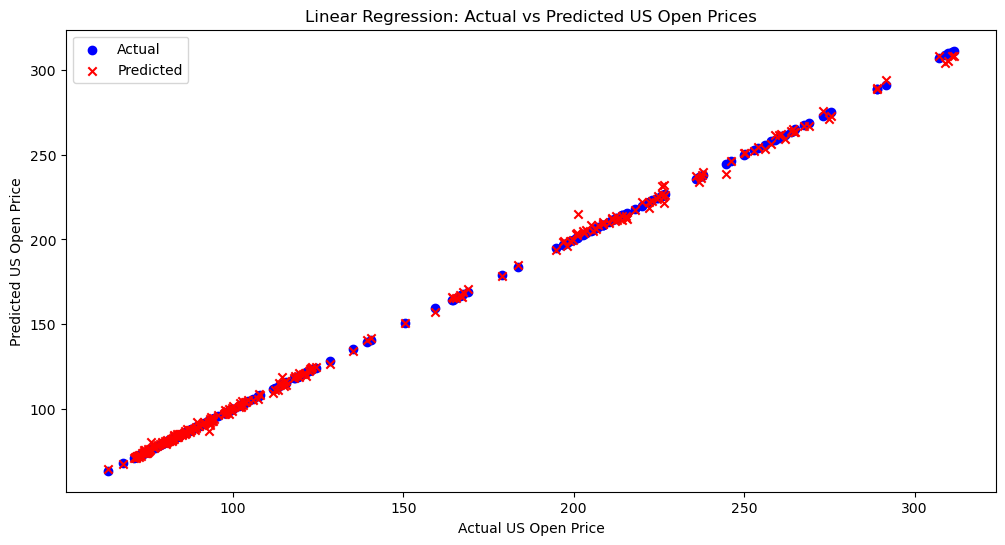

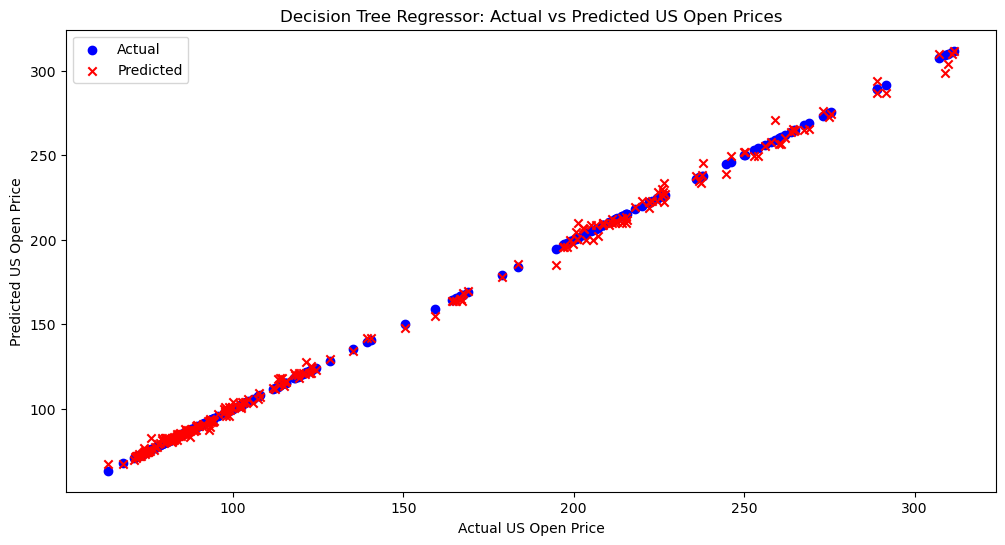

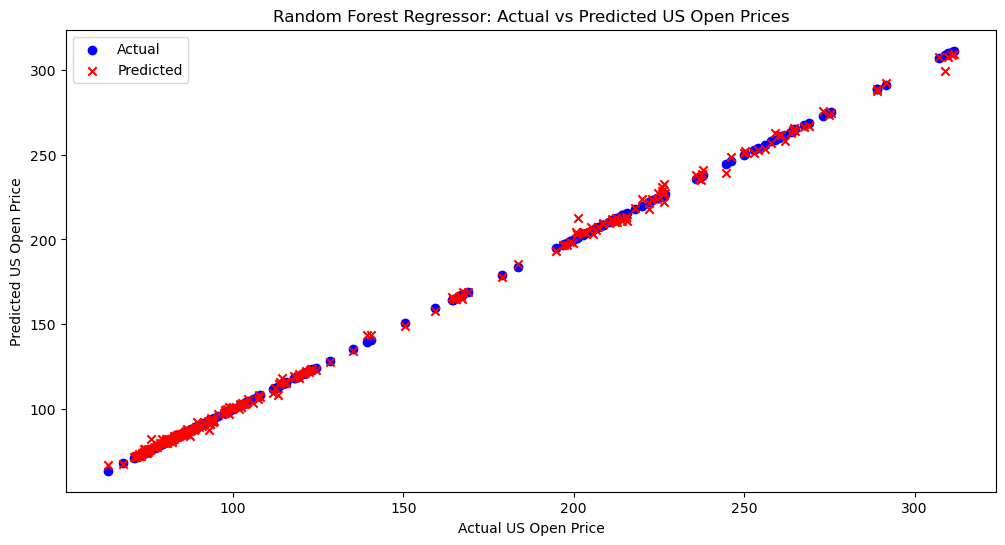

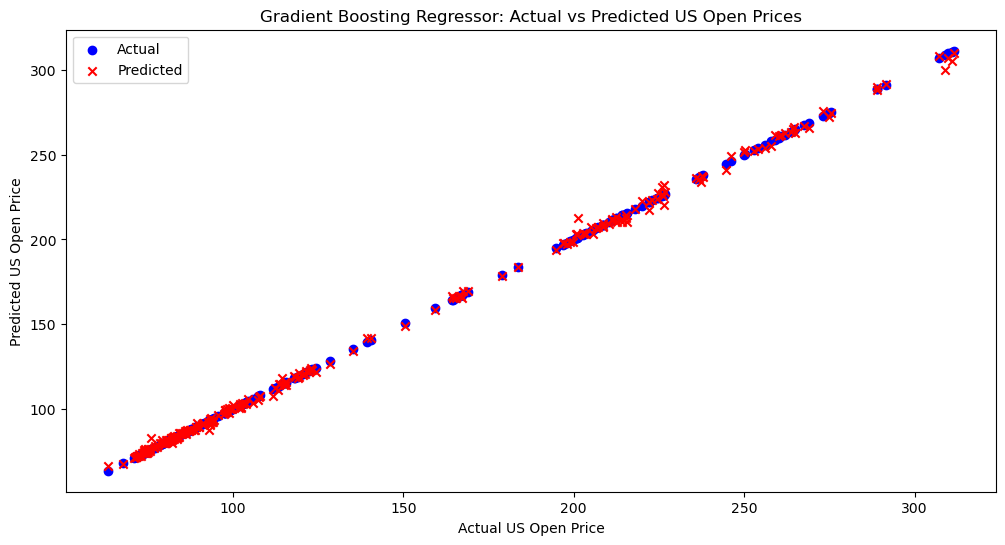

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a DataFrame
df = pd.read_csv('stock_data.csv')

# Machine Learning models to predict US Open Price based on multiple features
# Prepare the data
X = df[['HK_Close', 'US_Close', 'VIX', 'Treasury_Yield', 'RSI_US', 'US_HK_Ratio','US_Volume','HK_Volume', 'US_MA20','HK_MA20']]
y = df['US_Open']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, R^2 Score: {r2}")
    return y_pred

# Linear Regression
linear_model = LinearRegression()
y_pred_lr = evaluate_model(linear_model, X_train, X_test, y_train, y_test, "Linear Regression")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=45)
y_pred_dt = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree Regressor")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=45)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest Regressor")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=45)
y_pred_gb = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting Regressor")

# Plot actual vs predicted values for each model
models_predictions = {
    "Linear Regression": y_pred_lr,
    "Decision Tree Regressor": y_pred_dt,
    "Random Forest Regressor": y_pred_rf,
    "Gradient Boosting Regressor": y_pred_gb
}

for model_name, y_pred in models_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_test, color='blue', label='Actual', marker='o')
    plt.scatter(y_test, y_pred, color='red', label='Predicted', marker='x')
    plt.xlabel('Actual US Open Price')
    plt.ylabel('Predicted US Open Price')
    plt.title(f"{model_name}: Actual vs Predicted US Open Prices")
    plt.legend()
    plt.show()


### Trading performance for different regression models (using our trading simulator class):

Skipped 11 sell signals due to insufficient positions.

=== Linear Regression Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 101428.67
Portfolio Growth: 1.43%
Total Buys: 126, Total Sells: 115
-----------------------------------



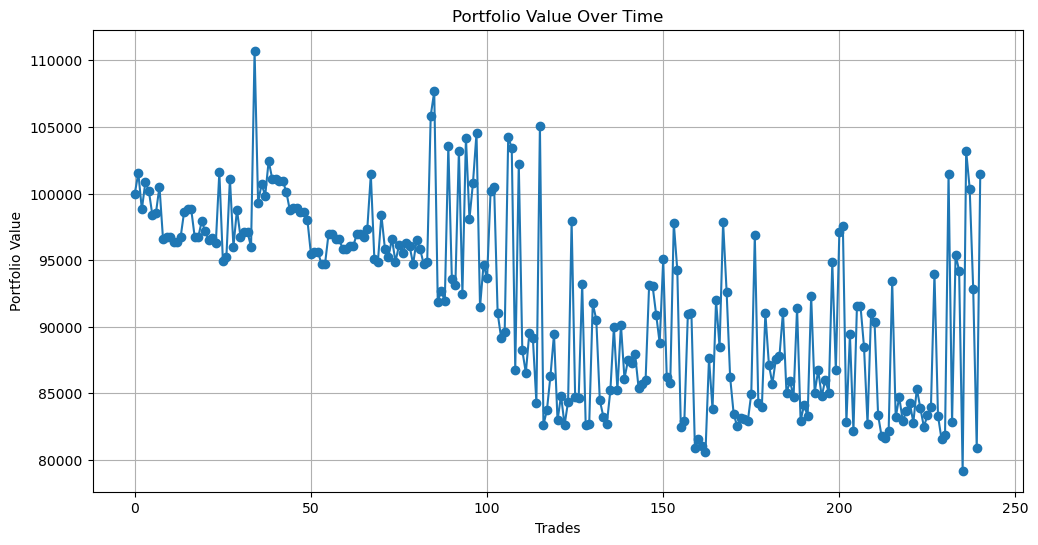

Skipped 4 sell signals due to insufficient positions.

=== Decision Tree Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 116726.82
Portfolio Growth: 16.73%
Total Buys: 124, Total Sells: 124
-----------------------------------



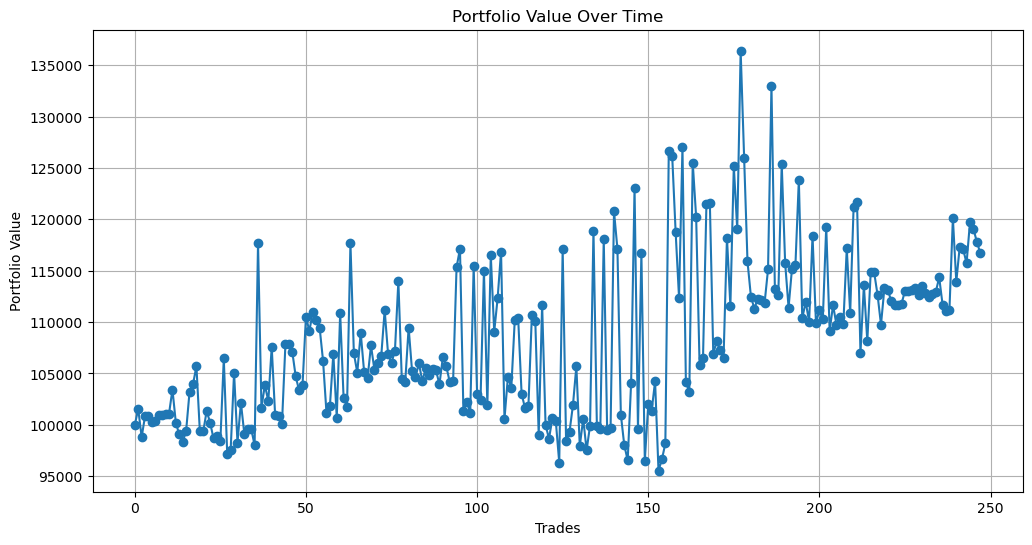

Skipped 7 sell signals due to insufficient positions.

=== Random Forest Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 130989.12
Portfolio Growth: 30.99%
Total Buys: 132, Total Sells: 113
-----------------------------------



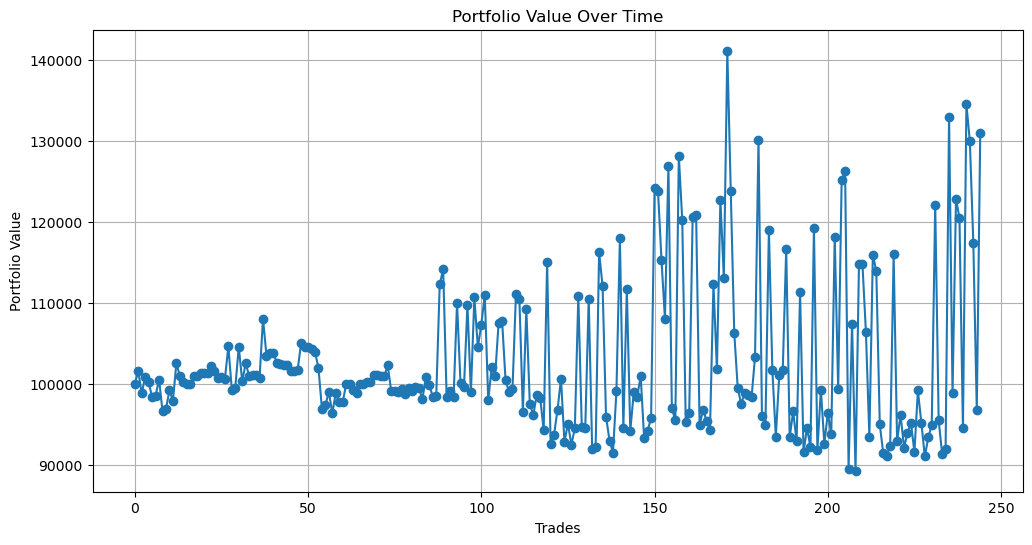

Skipped 17 sell signals due to insufficient positions.

=== Gradient Boosting Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 117062.53
Portfolio Growth: 17.06%
Total Buys: 123, Total Sells: 112
-----------------------------------



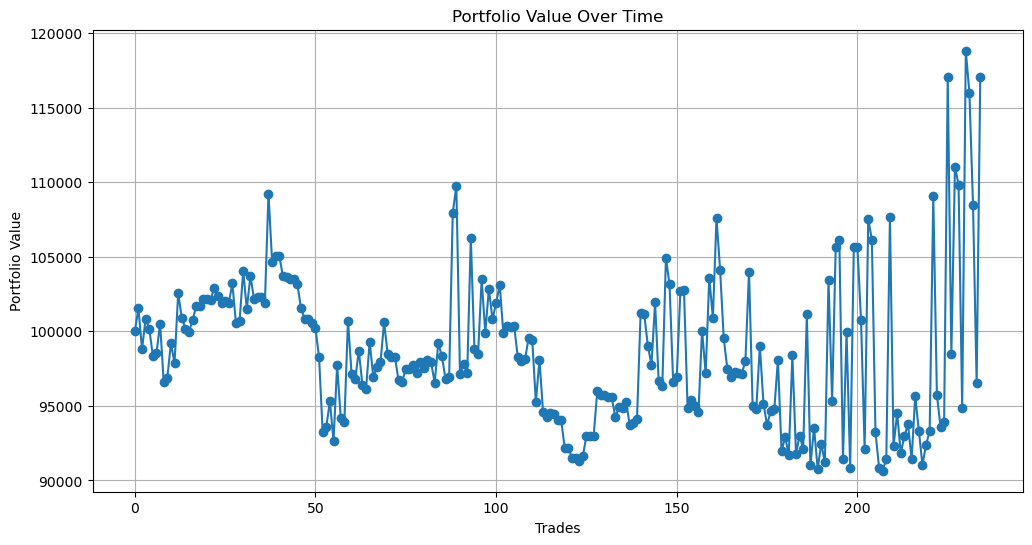

Trade Log for Linear Regression:
  Action       Price  Quantity  Total Cost/Revenue  Portfolio Value
0    BUY   76.510002        10          765.865121     99999.234900
1    BUY  230.570007        10         2308.005773    101537.529252
2   SELL   94.029999        10          939.359688     98805.788781
3    BUY  299.950012        10         3002.499622    100861.989415
4    BUY  265.799988        10         2660.657878    100176.330927
5    BUY  205.399994        10         2056.053939     98362.277110
6   SELL  209.960007        10         2097.500467     98542.578023
7   SELL  276.010010        10         2757.339998    100521.318014
8   SELL   81.019997        10          809.389766     96620.707552
9   SELL   90.050003        10          899.599530     96710.107116


Trade Log for Decision Tree Regressor:
  Action       Price  Quantity  Total Cost/Revenue  Portfolio Value
0    BUY   76.510002        10          765.865121     99999.234900
1    BUY  230.570007        10         230

In [5]:
from TradingSimulator import TradingSimulator

# Generate trading signals based on predicted and actual values
# Signal: 1 (Buy) if prediction > actual, -1 (Sell) if prediction < actual, 0 (Hold)
def generate_signals(y_test, y_pred):
    signals = pd.DataFrame({'Actual': y_test.reset_index(drop=True), 'Predicted': y_pred})
    signals['signal'] = signals.apply(lambda row: 1 if row['Predicted'] > row['Actual']
                                      else -1 if row['Predicted'] < row['Actual'] else 0, axis=1)
    return signals

# Test each model with the TradingSimulator
results = {}

for model_name, y_pred in models_predictions.items():
    # Generate signals
    signals = generate_signals(y_test, y_pred)
    
    # Combine signals with test data
    df_test = df.loc[X_test.index].reset_index(drop=True)
    df_test['signal'] = signals['signal']
    
    # Initialize and run the simulator
    simulator = TradingSimulator(initial_cash=100000, transaction_fee=0.001)
    simulator.run(df_test, signal_column='signal', price_column='US_Close')
    
    # Get results and store them
    final_portfolio_value = simulator.get_portfolio_value(df_test['US_Close'].iloc[-1])
    trade_log = simulator.get_trade_log()
    results[model_name] = {
        "Simulator": simulator,  # Store the simulator instance for accessing methods later
        "Final Portfolio Value": final_portfolio_value,
        "Trade Log": trade_log
    }
    
    # Print summary and plot portfolio growth
    print(f"\n=== {model_name} Results ===")
    simulator.summary(df_test['US_Close'].iloc[-1])
    simulator.plot_portfolio_growth()
    

# Optional: Display trade logs for each model
for model_name, result in results.items():
    print(f"Trade Log for {model_name}:")
    print(result["Trade Log"].head(10))  # Display the first 10 rows for brevity
    print("\n")
